In [15]:
using Percolation, PyPlot

# percolation

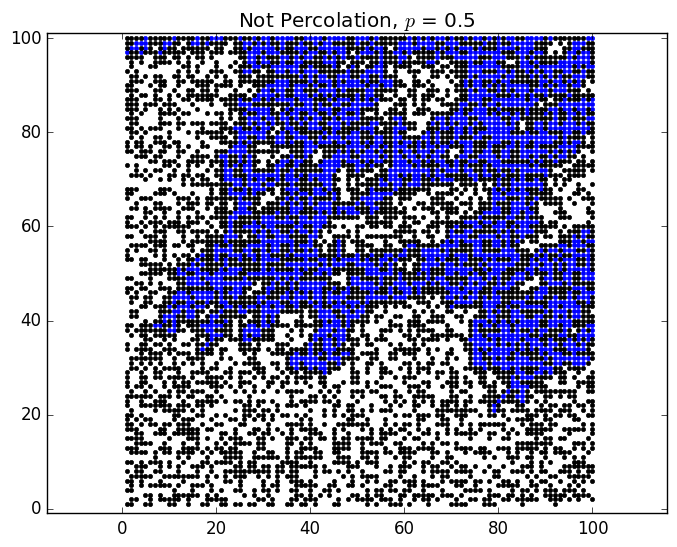

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [16]:
N = 100
p = 0.5
site = trinn(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

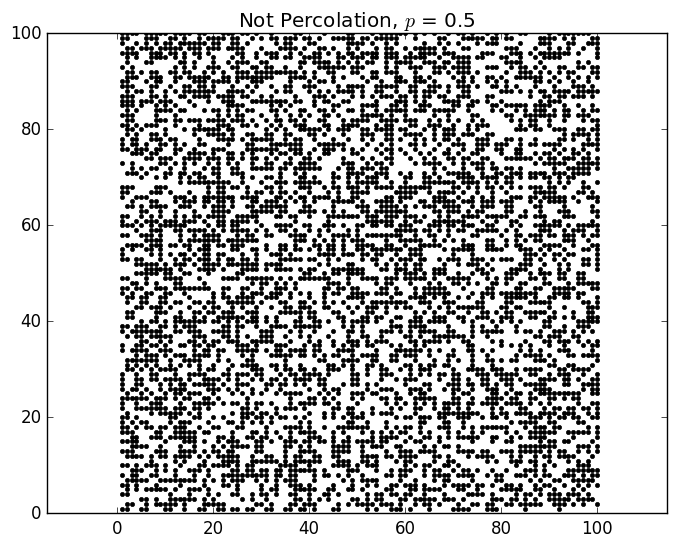

In [17]:
percolationplot(site, waterplot=false)

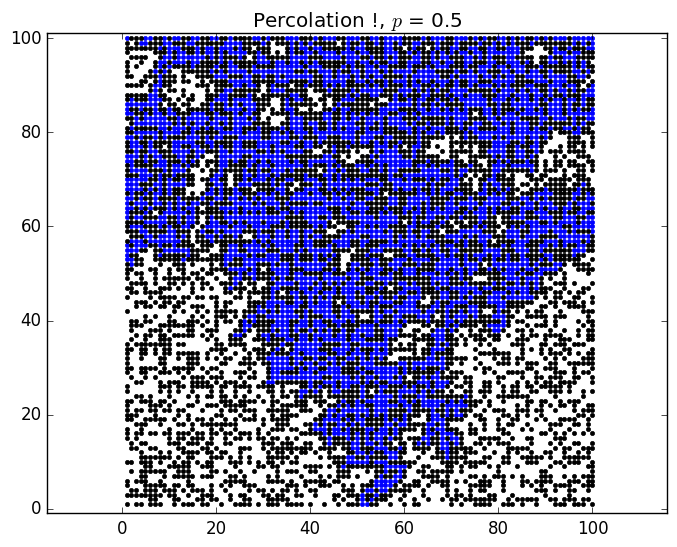

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [18]:
N = 100
p = 0.5
site = trinnrec(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

# cluster

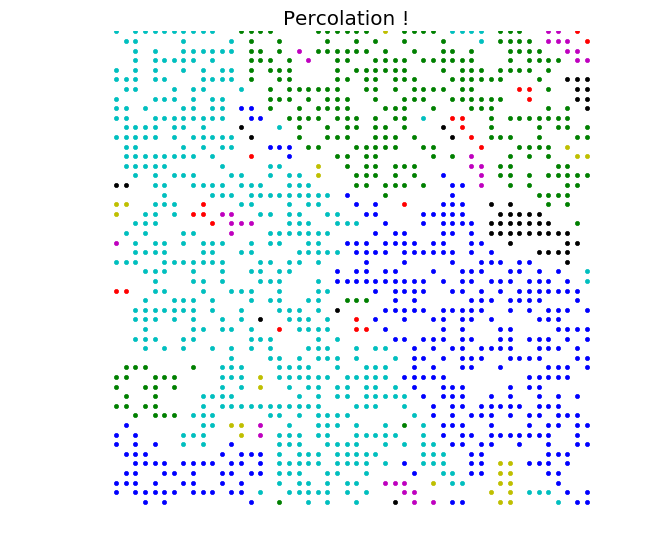

  0.017325 seconds (21.88 k allocations: 6.979 MB, 43.22% gc time)


In [32]:
site = trinn(50,0.5)
@time cluster(site)
clusterplot(site)

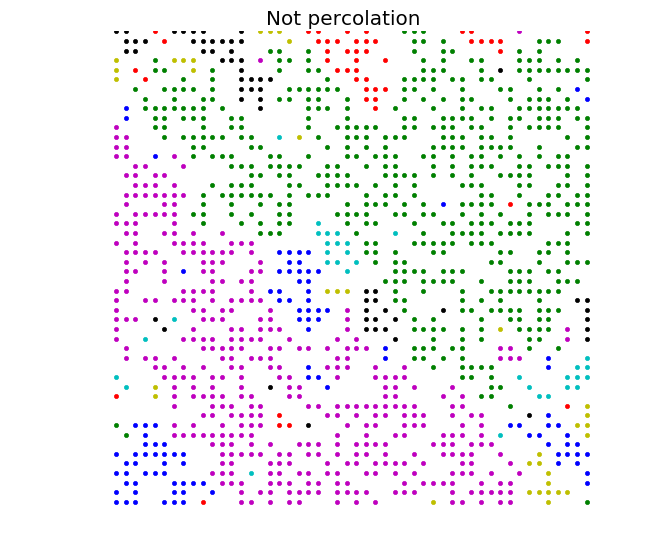

  0.000776 seconds (1.06 k allocations: 2.138 MB)


In [20]:
site = trinnrec(50,0.5)
@time cluster(site)
clusterplot(site)

# Order parameter

## triangular nearest neighbor

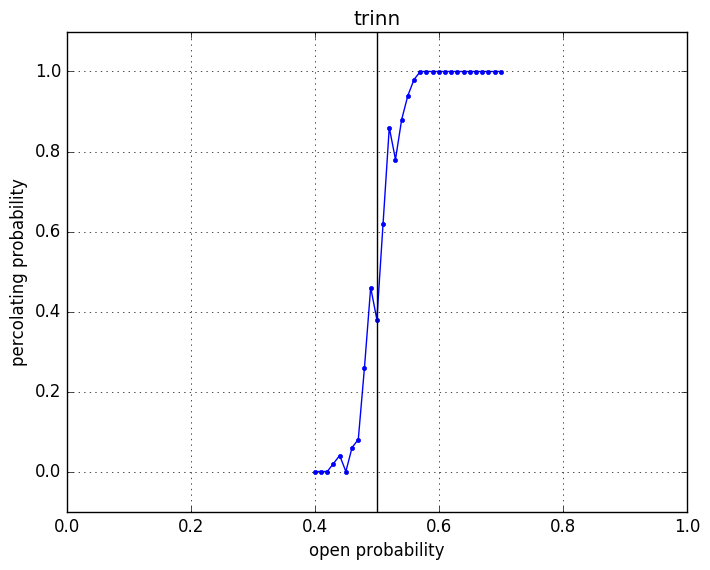

  0.566797 seconds (9.83 M allocations: 942.516 MB, 8.81% gc time)


In [21]:
# trinn
plist = collect(0.4:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinn(N, plist[i])
        hit[i] += percolation(tri)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

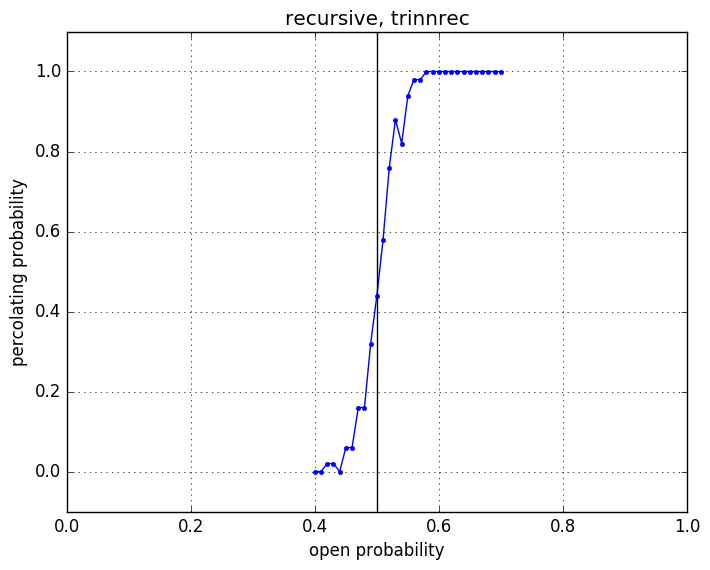

  0.105197 seconds (44.44 k allocations: 103.925 MB, 3.93% gc time)


In [22]:
# recursive, percolation
plist = collect(0.4:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinnrec(N, plist[i])
        hit[i] += percolation(tri)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("recursive, trinnrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

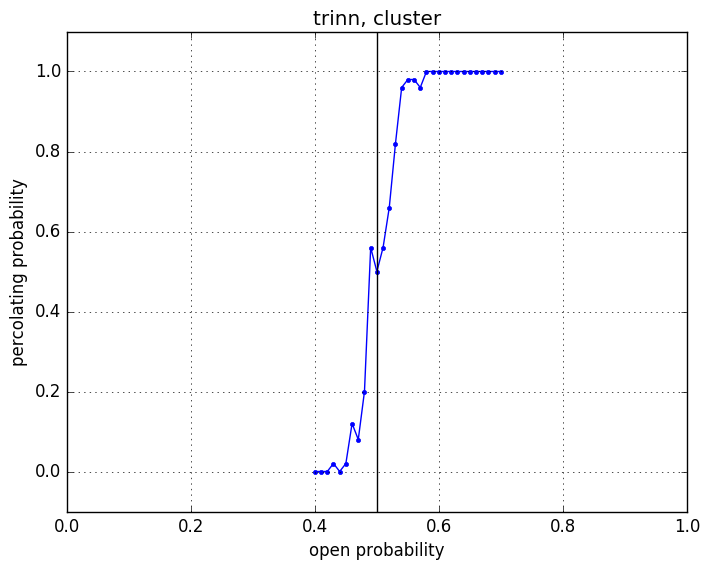

 12.376338 seconds (40.11 M allocations: 49.408 GB, 23.25% gc time)


In [23]:
# cluster
plist = collect(0.4:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinn(N, plist[i])
        cluster(tri)
        hit[i] += tri.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

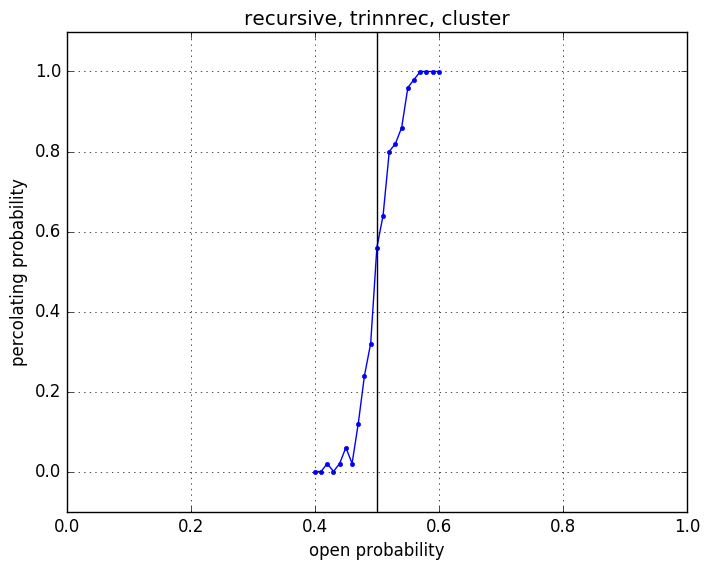

  1.539239 seconds (1.36 M allocations: 6.327 GB, 18.80% gc time)


In [24]:
# recursive, cluster
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        tri = trinnrec(N, plist[i])
        cluster(tri)
        hit[i] += tri.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("recursive, trinnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);